<a href="https://colab.research.google.com/github/hyunku/MNIST-study/blob/main/MNIST_CNN_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강남대학교 데이터사이언스 학술동아리 데이터 세상 활동자료 - made by 강현구

### 1주차 9/28 10:00 -> Introduction 및 CNN 기본 원리
### 2주차 10/5 10:00 -> CNN 심화 및 본 코드의 모델 예제로 이해
##### 텐서플로에서 가장 기본인 합성곱 연산과 풀링만 배워볼것.
##### 이외에도 복잡한 모델에 필요한 concatenate layer, batchnormalization, conv1d 등등 다양한 블록 존재.  
### 중간고사 
### 중간고사 끝나고 MNIST 데이터 CNN 적용해볼것임.

#### https://github.com/hyunku/k-project/blob/main/modeling/final_model_module.ipynb 여러 모델 구현해놓음. <br>
 모델에 관심 생기면 참고해보면 좋을듯

# 1주차 내용

Time Seris 데이터의 경우 LSTM, GRU, Conv1D 등등 인풋을 (batch(=raw), sequence, column) 으로 시간축 데이터를 생성해준 다음 3차원 데이터를 인풋으로 사용해주면 효과적임.

Image 데이터의 경우 Conv2D + 여러가지 기술들로 (batch, height(세로), width(가로), channel) 4차원 인풋으로 사용.

## 데이터들의 여러 차원 소개

흑백사진 1장, 데이터프레임 : 2차원 <br>
흑백사진 여러장 : 3차원 (batch, height, width) <br>
time series data : 3차원 (batch, sequence, col) -> 그냥 2차원으로 사용 많이 하지만 3차원으로 바꿔주는 것이 딥러닝에서 더욱 효과적임<br>
컬러사진 1장 : 3차원 (height, width, channel)
컬러사진 여러장 : 4차원 (batch, height, width, channel)


## 영상처리의 분야들

1. 이미지 복원(분광처리, 양자화) - 원본 이미지 화질 떨어질 시 Sampling(픽셀나눔) & Quantyfing(양자화) 로 이미지 화질 upgrade 
-> 관심있으면 가상현실 전공 배성근 교수님 영상처리 수업 들어볼것.
2. 이미지 분류 - 학습시 인풋으로 사진, 타겟으로  label 사용
3. 객체 검출 - 학습시 인풋으로 사진 내 객체의 좌표들, 타겟으로 사진 내 객체들의 label. 보통 annotation 파일 json형식으로 따로 주어짐.

CNN 개념은 패드나 그림판으로 설명할 예정. <br><br>
1. convolution 연산<br>
2. stride<br>
3. kernel<br>
4. filter<br>
5. padding<br>
6. activation

In [23]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Input
import random

In [18]:
# 원본 데이터 형태 확인
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print(f'X_train: {X_train.shape}       X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}       Y_test: {Y_test.shape}')

X_train: (60000, 28, 28)       X_test: (10000, 28, 28)
Y_train: (60000,)       Y_test: (10000,)


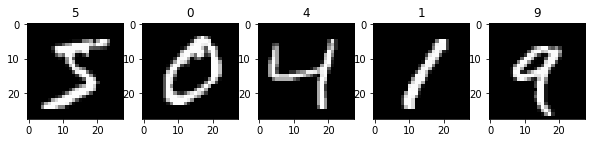

In [15]:
# 보고싶은 데이터
show_img = X_train[:5,:,:]
show_label = Y_train[:5]

fig, axs = plt.subplots(figsize=(10,10), nrows=1, ncols=5) # 그림들 (1,5) 꼴로 보고 싶음
for i in range(5):
  axs[i].imshow(show_img[i], cmap='gray')
  axs[i].set_title(show_label[i])

In [19]:
# 4차원 데이터로 만들어주기 (CNN 인풋 형태)
X_train = X_train.reshape(-1,28,28,1)/255.
X_test = X_test.reshape(-1,28,28,1)/255.
# one-hot encoding 형태로 바꿔줌 -> 나중에 compile 할때 categorical_crossentropy 사용
# 목표변수를 one-hot encoding 하지 않았다면 추후에 compile할때 sparse_categorical_crossentropy 사용
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 형태 바꿔준 후 모양 확인
print(f'X_train: {X_train.shape}       X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}       Y_test: {Y_test.shape}')

X_train: (60000, 28, 28, 1)       X_test: (10000, 28, 28, 1)
Y_train: (60000, 10)       Y_test: (10000, 10)


In [27]:
# CNN 모델 만들기
input_tensor = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])) # 28 * 28 * 1
x = Conv2D(32,(3,3),1,padding='same',activation='relu')(input_tensor) # 28 * 28 * 32
x = Conv2D(64,(3,3),activation='relu')(x) # 26 * 26 * 64
x = MaxPooling2D(2)(x) # 13 * 13 * 64
x = Flatten()(x) # 10816
x = Dense(100, activation='relu')(x) # 100
output = Dense(10, activation='softmax')(x) # 10
model = Model(inputs=input_tensor, outputs=output)

In [28]:
# 모델 요약
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               1081700   
                                                           

In [31]:
# 모델 학습
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
hist = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=256)

Epoch 1/30
235/235 [==============================] - 179s 761ms/step - loss: 0.0260 - acc: 0.9919 - val_loss: 0.0344 - val_acc: 0.9899
Epoch 2/30
235/235 [==============================] - 193s 819ms/step - loss: 0.0134 - acc: 0.9963 - val_loss: 0.0403 - val_acc: 0.9872
Epoch 3/30
235/235 [==============================] - 167s 712ms/step - loss: 0.0087 - acc: 0.9973 - val_loss: 0.0385 - val_acc: 0.9889
Epoch 4/30
235/235 [==============================] - 165s 703ms/step - loss: 0.0074 - acc: 0.9976 - val_loss: 0.0365 - val_acc: 0.9893
Epoch 5/30
235/235 [==============================] - 160s 683ms/step - loss: 0.0044 - acc: 0.9988 - val_loss: 0.0422 - val_acc: 0.9898
Epoch 6/30
235/235 [==============================] - 171s 727ms/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0422 - val_acc: 0.9890
Epoch 7/30
235/235 [==============================] - 155s 660ms/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0423 - val_acc: 0.9901
Epoch 8/30
235/235 [============================

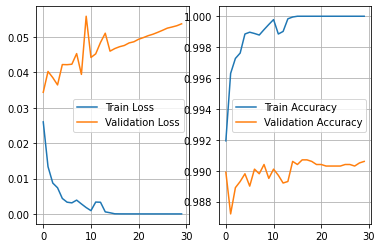

In [32]:
# 학습 결과 보기
loss = hist.history["loss"] # train 셋의 손실
acc = hist.history["acc"] # train 셋의 정확도
val_loss = hist.history["val_loss"] # 검증셋의 손실
val_acc = hist.history["val_acc"] # 검증셋의 정확도

# 모델 학습 결과 성능 시각화
plt.subplot(1,2,1) 
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

In [38]:
X_test.shape

(10000, 28, 28, 1)

(10000, 28, 28)
Actual : 2	Predict : 2


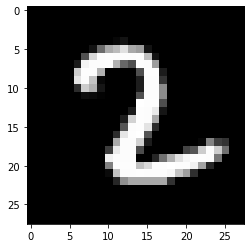

In [46]:
# 랜덤하게 하나 숫자 뽑아서 잘 예측했는지 확인하기

X_test_watch = X_test[:,:,:,0] # 흑백사진 시각화 시에는 1차원 없어야함 -> 1차원 있던거 없애주기
print(X_test_watch.shape)

index = random.randint(0,len(X_test))
plt.imshow(X_test_watch[index],cmap="gray")
predict = model.predict(X_test[index].reshape(1,28,28,1)) # 모델을 사용하여 예측 -> 예측할때는 4차원 데이터 필요. 1개데이터 사용하므로 맨 앞 1 명시(-1 써도됌 : auto-detect)
print("Actual : {}\tPredict : {}".format(np.argmax(Y_test[index]),np.argmax(predict)),)

In [48]:
# test 셋에서 틀린 데이터 개수 확인
wrong_index_list=[]
predict = model.predict(X_test)
for index in range(len(X_test)):
    if np.argmax(Y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))

[18, 115, 151, 247, 321, 340, 445, 582, 659, 674, 882, 883, 924, 938, 1014, 1039, 1112, 1226, 1232, 1242, 1247, 1260, 1319, 1393, 1414, 1522, 1530, 1549, 1709, 1717, 1878, 1901, 2035, 2040, 2070, 2118, 2129, 2130, 2293, 2462, 2582, 2597, 2654, 2770, 2896, 2921, 2927, 2939, 3225, 3503, 3520, 3558, 3559, 3727, 3762, 3808, 3853, 4078, 4176, 4199, 4201, 4360, 4571, 4740, 4761, 4807, 4823, 5331, 5457, 5654, 5749, 5937, 5955, 5982, 6091, 6576, 6597, 6625, 7216, 8325, 8408, 8527, 9009, 9015, 9019, 9024, 9620, 9638, 9642, 9664, 9692, 9729, 9770, 9839]
총 틀린 갯수 :  94


Actual : 7	Predict : 0


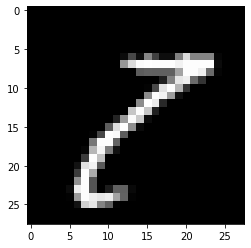

In [50]:
# 틀린 것들 랜덤하게 보여주기
X_test_watch = X_test[:,:,:,0] 

new_index = random.choice(wrong_index_list)
plt.imshow(X_test_watch[new_index],cmap="gray")
print("Actual : {}\tPredict : {}".format(np.argmax(Y_test[new_index]),np.argmax(new_index)),)